<a href="https://colab.research.google.com/github/gyaneshhere/HuggingFace/blob/main/AudioDataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets[audio] librosa transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [2]:
# Load the dataset in streaming mode

from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", name="de", streaming=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [9]:
# Take the first three examples from the training part

ds_head = ds['train'].take(4)

In [10]:
# Get the third example and explore it

example = list(ds_head)[-1]
example

{'audio_id': '20160511-0900-PLENARY-11-de_20160511-15:02:46_1',
 'language': 1,
 'audio': {'path': 'train_part_0/20160511-0900-PLENARY-11-de_20160511-15:02:46_1.wav',
  'array': array([-0.02252197, -0.01947021, -0.02090454, ..., -0.13650513,
         -0.13287354, -0.07647705]),
  'sampling_rate': 16000},
 'raw_text': 'Wie Sie sich erinnern, hat der Präsident während der Sitzung am',
 'normalized_text': 'wie sie sich erinnern hat der präsident während der sitzung am.',
 'gender': 'male',
 'speaker_id': '28242',
 'is_gold_transcript': True,
 'accent': 'None'}

In [11]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

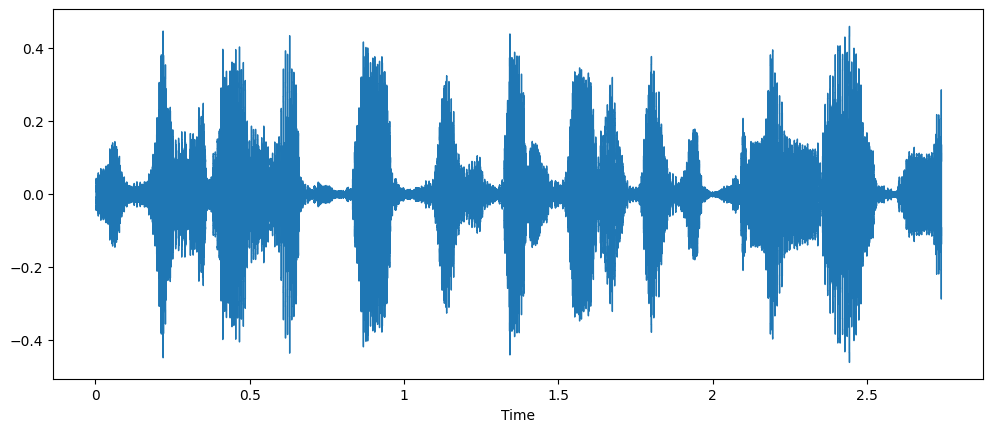

In [12]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

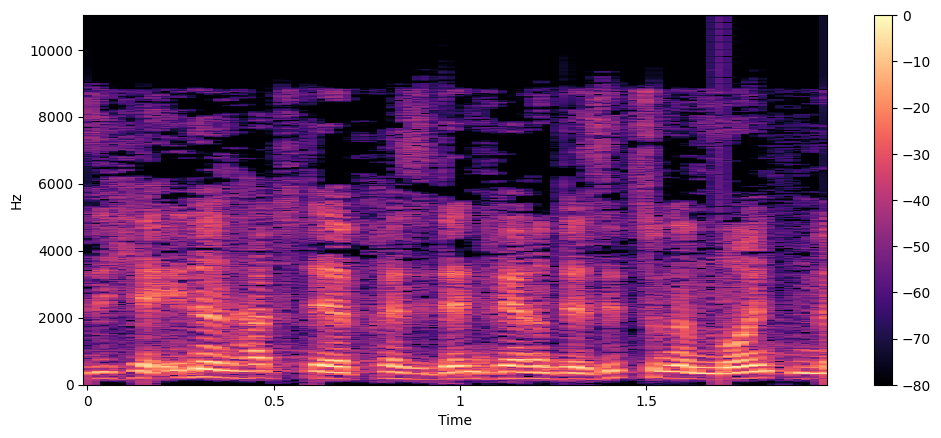

In [13]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [14]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

Device set to use cuda:0


In [15]:
# Compare the results

print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'erinnern hat der präsident während der sitzung am'}
Wie Sie sich erinnern, hat der Präsident während der Sitzung am


In [16]:
# Once again, listen to compare. Even though the output doesn't match exactly the provided transcription, the model actually does really well.
# You don't really hear the "Denn es gibt bio" part in the Audio.

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)